<a href="https://colab.research.google.com/github/AleR26/ColabFiles/blob/main/PracticaRegresionLinealSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Regresión Lineal Simple con Scikit-Learn
---


## Datos del Estudiante

*   Apellidos y Nombre:Alejandra Margarita Rivas Simental
*   Matrícula:263162

---

## Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar la regresión lineal simple utilizando Scikit-Learn para modelar la relación entre dos variables numéricas**, verificar los principales supuestos del modelo (linealidad, normalidad de residuos y homocedasticidad), **interpretar los coeficientes del modelo**, calcular e interpretar la **correlación entre variables** y evaluar el desempeño del modelo mediante métricas como el MSE, RMSE y R².


Trabajarás con el archivo restaurantes.csv, que contiene dos columnas:

- `poblation`: población de la ciudad (variable independiente). Tiene valores decimales mayores que cero. Estos valores representan la población de la ciudad multiplicada por 10,000. Por ejemplo, 6.1101 significa que la población de esa ciudad es 61,101.

- `profit`: ganancia del restaurante en esa ciudad (variable dependiente). Tiene valores decimales, algunos negativos y otros positivos. Estos representan las ganancias mensuales promedio de su restaurante en cada ciudad, en unidades de $10,000. Por ejemplo, 17.592 representa 175,920 en ganancias mensuales promedio para esa ciudad. -2.6807 representa -26,807 en pérdidas mensuales promedio para esa ciudad.





## 🔧 Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `restaurantes.csv`
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente el conjunto de datos.

In [2]:
# Escribe tu código aquí
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/sample_data/restaurantes.csv')
print(df.head(5))
print("Descripción estadistica de los datos\n", df.describe())


   poblation   profit
0     6.1101  17.5920
1     5.5277   9.1302
2     8.5186  13.6620
3     7.0032  11.8540
4     5.8598   6.8233
Descripción estadistica de los datos
        poblation     profit
count  97.000000  97.000000
mean    8.159800   5.839135
std     3.869884   5.510262
min     5.026900  -2.680700
25%     5.707700   1.986900
50%     6.589400   4.562300
75%     8.578100   7.046700
max    22.203000  24.147000


##  Parte 2: Análisis exploratorio y relación entre variables

### 2.1 Diagrama de Dispersión
1. Grafica un **diagrama de dispersión** entre `poblation` y `profit`
2. Responde:  
**¿La relación entre las variables parece lineal? ¿Por qué?**

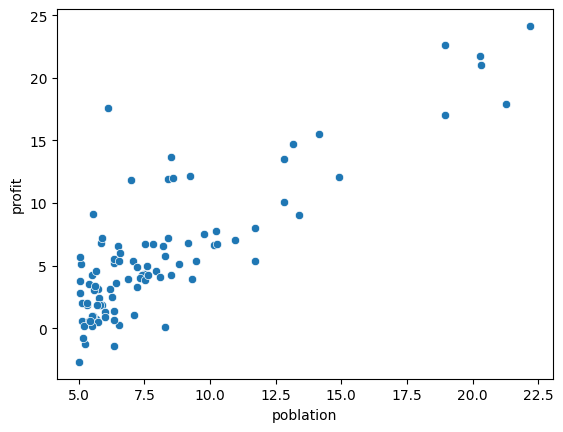

In [15]:
# Diagrama de dispersión
# Crear un scatterplot entre 'poblation' y 'profit'
sns.scatterplot(x='poblation', y='profit', data=df)

# Mostrar el gráfico
plt.show()

### 2.2: Cálculo e interpretación de la correlación
1. Calcula e imprime el **coeficiente de correlación de Pearson** entre `poblation` y `profit`
2. Interpreta el resultado:
- ¿Qué tan fuerte es la relación? **La correlacion es de 0.83 por lo que podemos decir que es una correlación fuerte**
- ¿Es positiva o negativa? **Tenemos una correlación positiva**
- ¿Es coherente con el gráfico anterior? **Si**

In [6]:
# Cálculo de correlación
correlacion_df = df.corr(method = 'pearson')
print(f"Correlacion de Pearson\n{correlacion_df}")

Correlacion de Pearson
           poblation    profit
poblation   1.000000  0.837873
profit      0.837873  1.000000


## Parte 3: Construcción del modelo, coeficientes y visualización

###3.1 Construcción del modelo - obtención de los parámetros y coeficientes
1. Construye un modelo de regresión lineal simple usando las bibliotecas de Scikit-Learn
2. Imprime el intercepto y el coeficiente de la regresión (pendiente)
3. Interpreta el Intercepto: ¿Qué significa en términos del contexto del problema?
4. Interpreta el coeficiente de la regresión (pendiente) ¿Qué significa en términos del contexto del problema?

In [11]:
# Construcción del modelo  y Coeficientes del modelo
modelo_regresion = LinearRegression()

# Reshape the 'poblation' column to a 2D array
x = df['poblation'].values.reshape(-1, 1)
y = df['profit']

#Entrenar el modelo
modelo_regresion.fit(x, y)
print("Modelo entrenado exitosamente!")

pendiente = modelo_regresion.coef_[0]
intercepto = modelo_regresion.intercept_

print(f"\nCoeficiente (Pendiente, β₁): {pendiente:.4f}")
print(f"Intercepto (Ordenada al origen, β₀): {intercepto:.4f}")

print(f"\nEcuación de Regresión: Y = {intercepto:.4f} + {pendiente:.4f} * X")



Modelo entrenado exitosamente!

Coeficiente (Pendiente, β₁): 1.1930
Intercepto (Ordenada al origen, β₀): -3.8958

Ecuación de Regresión: Y = -3.8958 + 1.1930 * X


### 3.2 Visualización del modelo
1. Grafica los puntos originales (poblation vs profit) y dibuja la línea de regresión ajustada.
2. Asegúrate de incluir leyenda y títulos.

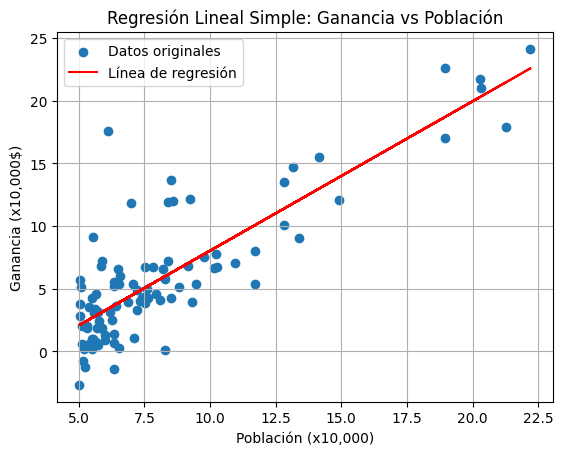

In [16]:
# Visualización del modelo ajustado

# Graficar los puntos originales
plt.scatter(x, y, label='Datos originales')

# Dibujar la línea de regresión ajustada
plt.plot(x, modelo_regresion.predict(x), color='red', label='Línea de regresión')

# Añadir etiquetas y título
plt.xlabel('Población (x10,000)')
plt.ylabel('Ganancia (x10,000$)')
plt.title('Regresión Lineal Simple: Ganancia vs Población')
plt.legend()
plt.grid(True)
plt.show()

## Parte 4: Supuestos del modelo de regresión lineal

### 4.1. Normalidad de los residuos
1. Calcula los residuos (reales - predichos).
2. Grafica un **histograma con KDE** de los residuos.
3. Responde: ¿Los residuos siguen una distribución normal?

In [ ]:
# Normalidad de los residuos


### 4.2. Homocedasticidad
1. Grafica los residuos vs valores predichos.
2. ¿Los residuos están distribuidos aleatoriamente o muestran un patrón?

In [ ]:
# Gráfico de residuos vs predichos


### 4.3. Q-Q Plot para evaluar la normalidad
1. Grafica el Q-Q Plot:.
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal y b) Desviaciones sistemáticas indican asimetría o colas pesadas.

In [ ]:
# Q-Q Plot


## Parte 5: Evaluación del modelo
1. Calcula las métricas:
- MSE
- RMSE
- R²
2. Interpreta: ¿Qué nos dicen sobre el ajuste del modelo?

In [13]:
# Evaluación del modelo
# Evaluar la calidad del modelo (R-cuadrado)
r_cuadrado = modelo_regresion.score(x, y)

print(f"\nCoeficiente de Determinación (R²): {r_cuadrado:.4f}")


Coeficiente de Determinación (R²): 0.7020


## Parte 6: Conclusiones
Responde con tus propias palabras:
- ¿Qué tan útil consideras el modelo?
- ¿Qué limitaciones encuentras?
- ¿Crees que es necesario hacer un ajuste o estandarización a las variables dependientes o independientes?  Si crees que es necesario hacerlo realiza el ajuste.